In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_excel(r"C:\Users\E1\Desktop\Language Barrier Sandesh.xlsx")
df.head(2)


,Age,Gender,Background_Type,Home_Language,Duration_in_eng_env,Medium,10th_Marks,12th_Marks,Graduation_Marks,Satisfaction_Language,...,Mental_Health_Status,Stress_Levels,Pronunciation_Difficulties,Confidence_in_eng,Part_Time_Job,English_courses_taken,faced_interview,Got_selected,Language_Barrier,ur_thoughts
0,24,Male,Rural,Marathi,4,Marathi,80,59,67,6,...,5,9,8,6,No,No,No,No,Yes,"I read books, watch English movies with subtitles"
1,21,Male,Rural,Marathi,0.5,Semi English,85.6,67.51,8.09,5,...,5,5,5,6,No,No,No,No,Yes,Yes I try my best


In [3]:
df.shape

(220, 23)

In [4]:
df.shape

(220, 23)

In [ ]:
df.info()

In [ ]:
df.describe()

In [5]:
import pandas as pd
df = df[pd.to_numeric(df['10th_Marks'], errors='coerce').notna()]

# Convert '10th_Marks' column to numeric 
df['10th_Marks'] = pd.to_numeric(df['10th_Marks'])

# Calculate the mean value of the non-NaN values
mean_value = df['10th_Marks'].mean()

# Replace NaN values with the mean value
df['10th_Marks'] = df['10th_Marks'].fillna(mean_value)

In [6]:
df.shape

(214, 23)

In [7]:
# Apply formatting condition to '10th_Marks' column
df['10th_Marks'] = df['10th_Marks'].apply(lambda x: x * 0.1 if  x > 100 else x)
df['10th_Marks'] = df['10th_Marks'].apply(lambda x: x * 10 if  x < 1 else x)
df['10th_Marks'] = df['10th_Marks'].apply(lambda x: x * 10 if  1< x <10 else x)


In [8]:
df.shape

(214, 23)

In [9]:
df = df[pd.to_numeric(df['12th_Marks'], errors='coerce').notna()]

# Apply formatting condition to '12th_Marks' column
df['12th_Marks'] = df['12th_Marks'].apply(lambda x: x * 0.1 if  x > 100 else x)
df['12th_Marks'] = df['12th_Marks'].apply(lambda x: x * 10 if  x < 1 else x)
df['12th_Marks'] = df['12th_Marks'].apply(lambda x: x * 10 if  1< x <10 else x)



In [10]:
df.shape

(200, 23)

In [11]:
df = df[pd.to_numeric(df['Graduation_Marks'], errors='coerce').notna()]

# Apply formatting condition to '12th_Marks' column
df['Graduation_Marks'] = df['Graduation_Marks'].apply(lambda x: x * 0.1 if  x > 100 else x)
df['Graduation_Marks'] = df['Graduation_Marks'].apply(lambda x: x * 10 if  x < 1 else x)
df['Graduation_Marks'] = df['Graduation_Marks'].apply(lambda x: x * 10 if  1< x <10 else x)
df['Graduation_Marks'].replace(356.10,35.6)
    


0      67.00
1      80.90
2      84.00
3      61.00
4      76.00
       ...  
215    85.30
216    60.00
217    64.80
218    67.50
219    78.32
Name: Graduation_Marks, Length: 175, dtype: float64

In [12]:
df.shape

(175, 23)

In [ ]:
df.info()

In [13]:
import pandas as pd
df = df[pd.to_numeric(df['Duration_in_eng_env'], errors='coerce').notna()]

# Convert 'Duration_in_English_environment' column to numeric
df['Duration_in_eng_env'] = pd.to_numeric(df['Duration_in_eng_env'])

# Calculate the mean value of the non-NaN values
mean_value = df['Duration_in_eng_env'].mean()

# Replace NaN values with the mean value
df['Duration_in_eng_env'] = df['Duration_in_eng_env'].fillna(mean_value)

In [14]:
df.shape

(162, 23)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 162 entries, 0 to 219
Data columns (total 23 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Age                            162 non-null    object 
 1   Gender                         162 non-null    object 
 2   Background_Type                162 non-null    object 
 3   Home_Language                  162 non-null    object 
 4   Duration_in_eng_env            162 non-null    float64
 5   Medium                         162 non-null    object 
 6   10th_Marks                     162 non-null    float64
 7   12th_Marks                     162 non-null    float64
 8   Graduation_Marks               162 non-null    float64
 9   Satisfaction_Language          162 non-null    int64  
 10  Satisfaction_Support           162 non-null    int64  
 11  Extracurricular_Participation  162 non-null    object 
 12  Social_Engagement              162 non-null    int64  


In [16]:
def hr_to_min(hr):
    minutes = hr*60
    return minutes
df["Duration_in_eng_env"] = df["Duration_in_eng_env"].apply(hr_to_min)

C:\Users\E1\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


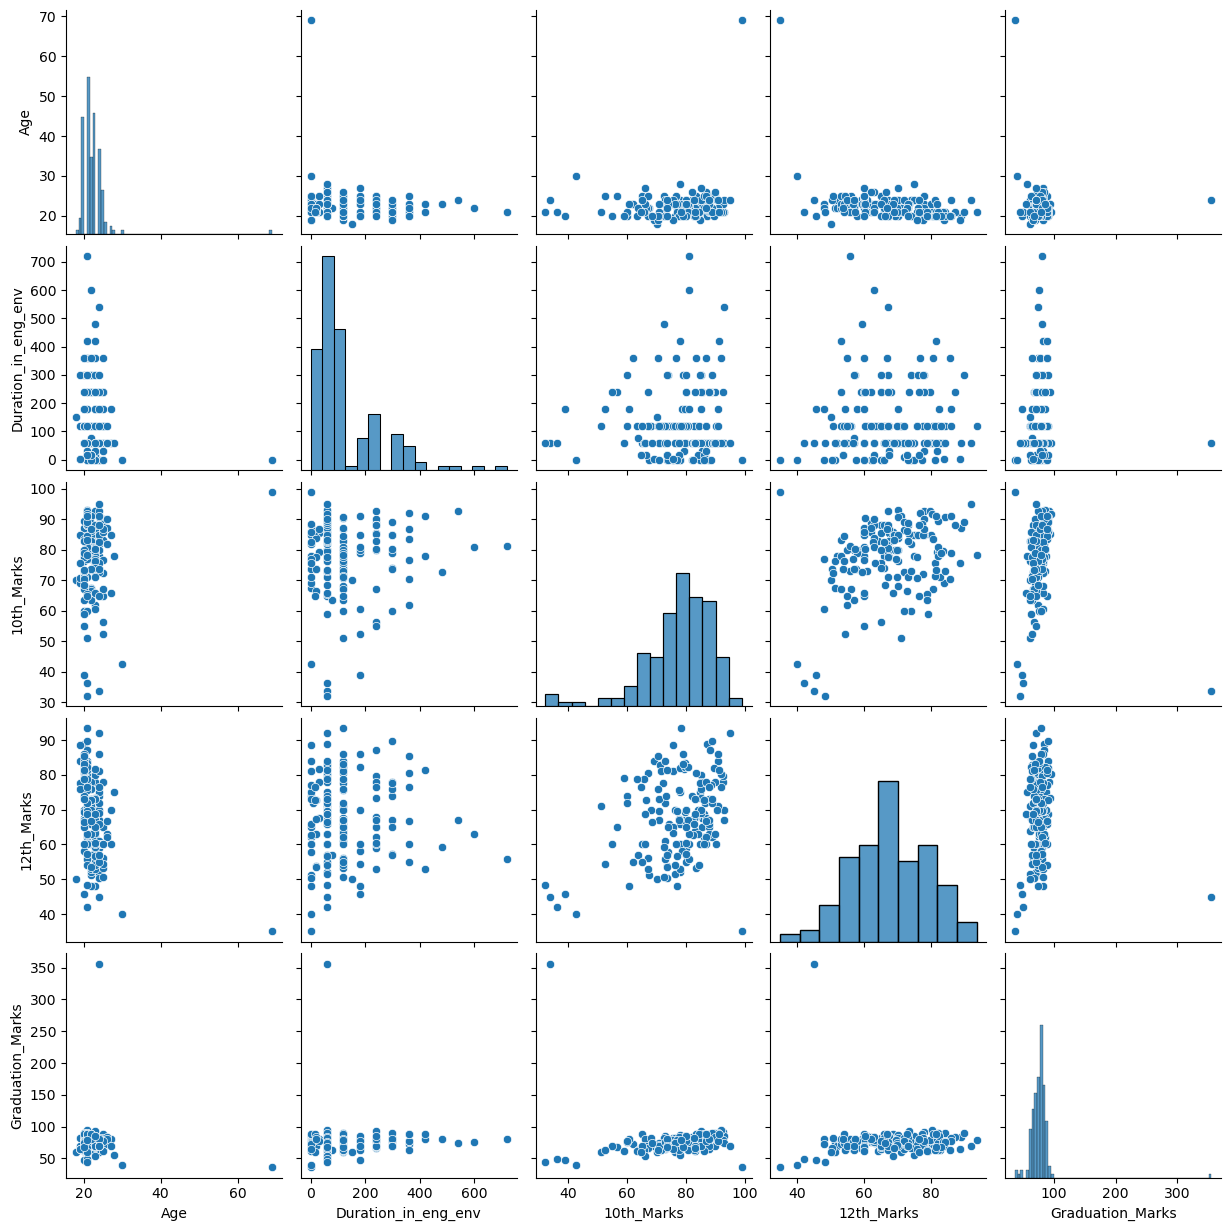

In [19]:
# Pairplot for numerical columns
sns.pairplot(df[['Age', 'Duration_in_eng_env', '10th_Marks', '12th_Marks', 'Graduation_Marks']])
plt.show()



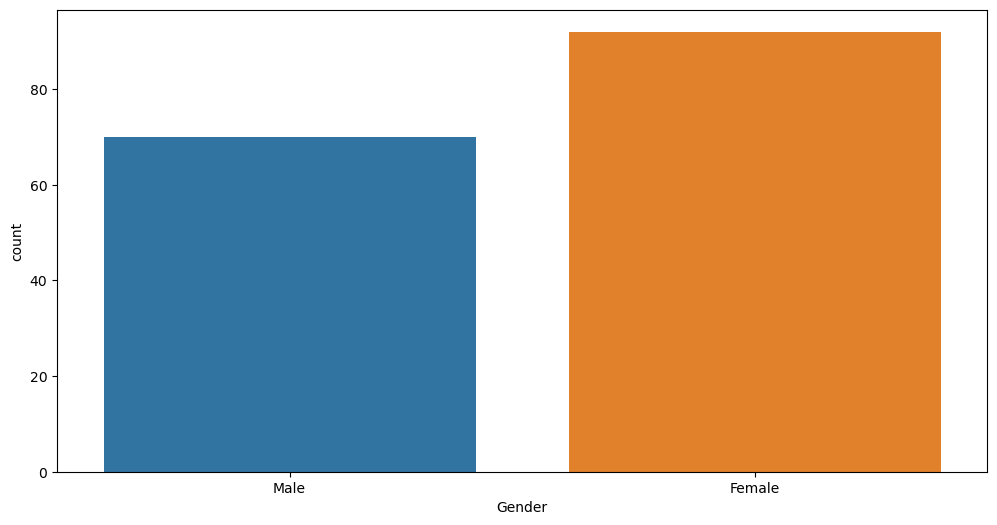

In [20]:
# Countplot for categorical columns
plt.figure(figsize=(12, 6))
sns.countplot(x='Gender', data=df)
plt.show()

In [21]:
df.Gender.value_counts()

Gender
Female    92
Male      70
Name: count, dtype: int64

Chi-square test p-value: 0.7228520508723908


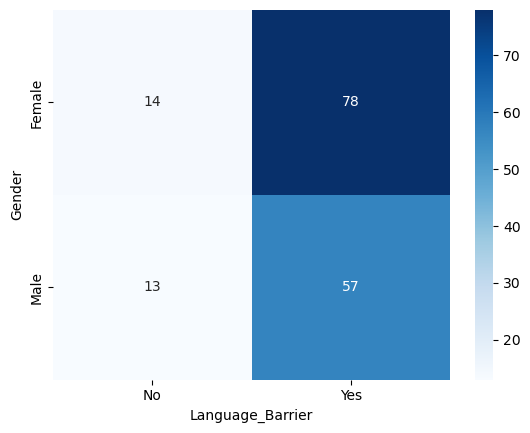

In [22]:
from scipy.stats import chi2_contingency

# df['gender'] are 'male' or 'female', and df['language_barrier'] are 'yes' or 'no'

# Create a contingency table
contingency_table = pd.crosstab(df['Gender'], df['Language_Barrier'])

# Visualize the contingency table
sns.heatmap(contingency_table, annot=True, fmt='d', cmap='Blues')

# Chi-square test for independence
chi2, p, _, _ = chi2_contingency(contingency_table)
print(f"Chi-square test p-value: {p}")

In [23]:
# df['background_type'] are 'rural' or 'urban'

# Descriptive Statistics
background_counts = df['Background_Type'].value_counts()
background_percentages = df['Background_Type'].value_counts(normalize=True) * 100

print("Counts of students by background type:")
print(background_counts)

print("\nPercentages of students by background type:")
print(background_percentages)

Counts of students by background type:
Background_Type
Rural    118
Urban     44
Name: count, dtype: int64

Percentages of students by background type:
Background_Type
Rural    72.839506
Urban    27.160494
Name: proportion, dtype: float64


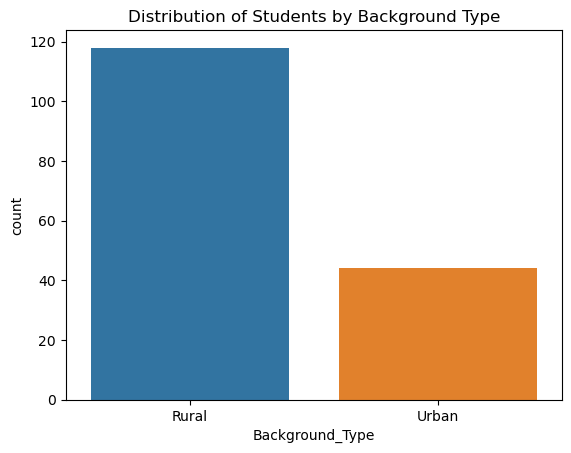

In [24]:
# Count Plot
sns.countplot(x='Background_Type', data=df)
plt.title('Distribution of Students by Background Type')
plt.show()


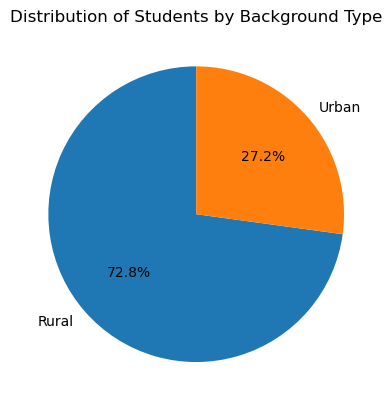

In [25]:
# Pie Chart
plt.pie(background_counts, labels=background_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Students by Background Type')
plt.show()

In [26]:
# Does Baground type empact on language barrier?
import pandas as pd
from scipy.stats import chi2_contingency

# Create a contingency table
contingency_table = pd.crosstab(df['Background_Type'], df['Language_Barrier'])

# Chi-square test for independence
chi2, p, _, _ = chi2_contingency(contingency_table)

print("Chi-square test p-value:", p)

# Visualize the contingency table
print("\nContingency Table:")
print(contingency_table)

Chi-square test p-value: 0.9370357956799604

Contingency Table:
Language_Barrier  No  Yes
Background_Type          
Rural             19   99
Urban              8   36


In [27]:
# Replace values in the "Home_Language" column
df['Home_Language'].replace({'Semi - English': 'English', 'Tulu': 'Telugu', "Telegu": "Telugu"}, inplace=True)


In [28]:
df.Home_Language.value_counts()


Home_Language
Marathi    137
Hindi        9
Kannada      8
English      3
Marwadi      2
Telugu       2
Urdu         1
Name: count, dtype: int64

In [29]:
home_language_distribution = df['Home_Language'].value_counts(normalize=True)
print(home_language_distribution)

Home_Language
Marathi    0.845679
Hindi      0.055556
Kannada    0.049383
English    0.018519
Marwadi    0.012346
Telugu     0.012346
Urdu       0.006173
Name: proportion, dtype: float64


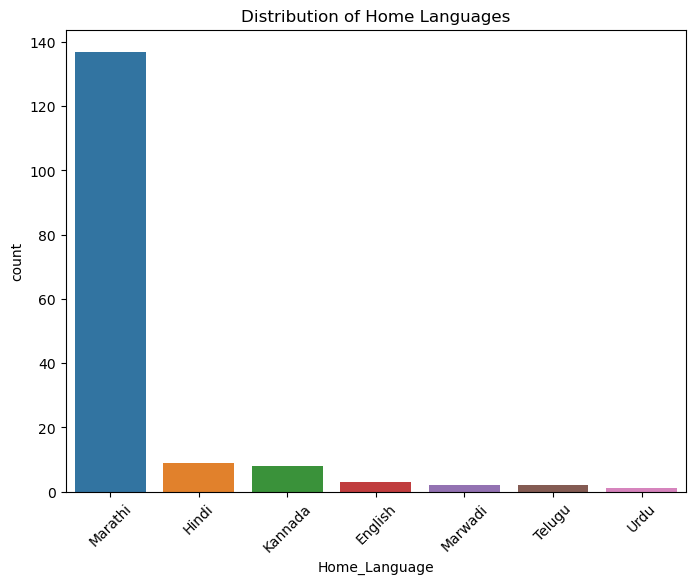

In [30]:
#Distribution of Home Languages
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.countplot(x='Home_Language', data=df, order=df['Home_Language'].value_counts().index)
plt.title('Distribution of Home Languages')
plt.xticks(rotation=45)
plt.show()

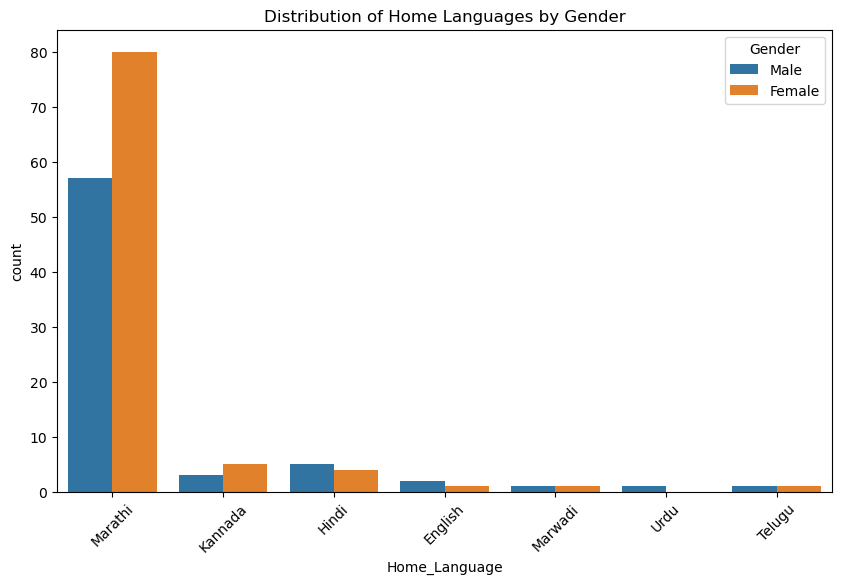

In [31]:
#Distribution of Home Languages by Gender
plt.figure(figsize=(10, 6))
sns.countplot(x='Home_Language', hue='Gender', data=df)
plt.title('Distribution of Home Languages by Gender')
plt.xticks(rotation=45)
plt.show()

In [32]:
from scipy.stats import f_oneway

# Check for groups with no data
home_language_counts = df['Home_Language'].value_counts()
empty_groups = home_language_counts[home_language_counts == 0].index

# Remove rows with empty groups
df_filtered = df[~df['Home_Language'].isin(empty_groups)]

from scipy.stats import kruskal

# Example assuming 'Satisfaction' is a numerical column with ratings 1 to 10
kruskal_results = kruskal(
    df[df['Home_Language'] == 'Marathi']['Satisfaction_Language'],
    df[df['Home_Language'] == 'Hindi']['Satisfaction_Language'],
    df[df['Home_Language'] == 'Kannada']['Satisfaction_Language'],
    df[df['Home_Language'] == 'English']['Satisfaction_Language'],
    df[df['Home_Language'] == 'Telugu']['Satisfaction_Language'])

print("Kruskal-Wallis H-test results:")
print("H-statistic:", kruskal_results.statistic)
print("p-value:", kruskal_results.pvalue)

Kruskal-Wallis H-test results:
H-statistic: 1.6696233830421108
p-value: 0.7962278935331437


In [33]:
# Encoding categorical variables with integer dtype
df = pd.get_dummies(df, columns=['Gender', 'Background_Type', 'English_courses_taken', 'faced_interview',
                                 'Got_selected', 'Extracurricular_Participation', 'Part_Time_Job',
                                 'Language_Barrier'], drop_first=True, dtype=int)

In [34]:
df.columns

Index(['Age', 'Home_Language', 'Duration_in_eng_env', 'Medium', '10th_Marks',
       '12th_Marks', 'Graduation_Marks', 'Satisfaction_Language',
       'Satisfaction_Support', 'Social_Engagement', 'Mental_Health_Status',
       'Stress_Levels', 'Pronunciation_Difficulties', 'Confidence_in_eng',
       'ur_thoughts', 'Gender_Male', 'Background_Type_Urban',
       'English_courses_taken_Yes', 'faced_interview_Yes', 'Got_selected_Yes',
       'Extracurricular_Participation_Yes',
       'Part_Time_Job_Yes, English is mandatory',
       'Part_Time_Job_Yes, English is not mandatory', 'Language_Barrier_Yes'],
      dtype='object')

In [35]:
df.shape

(162, 24)

In [36]:
print(df['Duration_in_eng_env'].describe())

count    162.000000
mean     127.240741
std      124.816377
min        0.000000
25%       60.000000
50%       60.000000
75%      180.000000
max      720.000000
Name: Duration_in_eng_env, dtype: float64


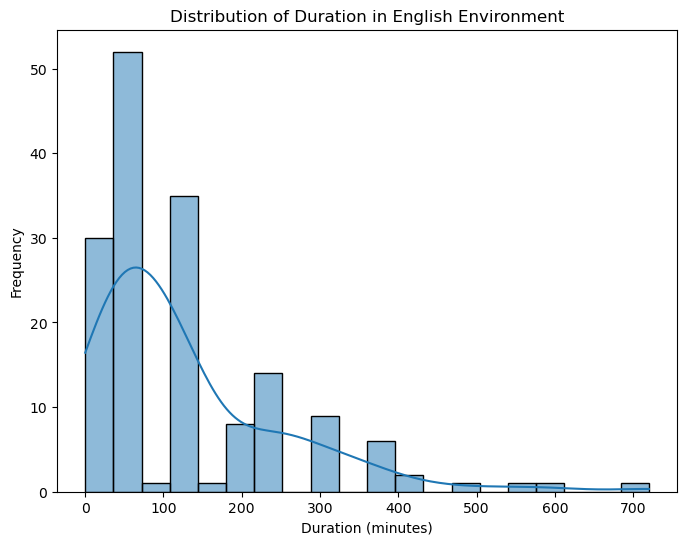

In [37]:
#Distribution of Duration in English Environment
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.histplot(df['Duration_in_eng_env'], bins=20, kde=True)
plt.title('Distribution of Duration in English Environment')
plt.xlabel('Duration (minutes)')
plt.ylabel('Frequency')
plt.show()

In [38]:
#Grouped duration according to home language
grouped_duration = df.groupby('Home_Language')['Duration_in_eng_env'].mean()
print(grouped_duration)

Home_Language
English     25.000000
Hindi      166.666667
Kannada     75.000000
Marathi    131.956204
Marwadi     60.000000
Telugu      90.000000
Urdu        60.000000
Name: Duration_in_eng_env, dtype: float64


In [39]:
# Example binning into short, medium, and long durations
bins = [30, 100, 300, float('inf')]
labels = ['Short', 'Medium', 'Long']
duration= pd.cut(df['Duration_in_eng_env'], bins=bins, labels=labels)
grouped_counts = duration.value_counts()
print(grouped_counts)

Duration_in_eng_env
Medium    67
Short     53
Long      12
Name: count, dtype: int64


In [43]:
import pandas as pd
import statsmodels.api as sm

numeric_columns = ['10th_Marks', '12th_Marks', 'Graduation_Marks']
df[numeric_columns] = df[numeric_columns].apply(pd.to_numeric, errors='coerce')

# Check the shape of the independent variables
print("Shape of X (independent variables):", df[["10th_Marks", "12th_Marks", "Graduation_Marks"]].shape)

# Add a constant term to the independent variables for the regression
X = sm.add_constant(df[["10th_Marks", "12th_Marks", "Graduation_Marks"]])

# Check the shape of the dependent variable
print("Shape of y (dependent variable):", df['Language_Barrier_Yes'].shape)

y = df['Language_Barrier_Yes']  

# Fit a linear regression model
model = sm.OLS(y, X)
results = model.fit()

# Display regression results
print(results.summary())


Shape of X (independent variables): (162, 3)
Shape of y (dependent variable): (162,)
                             OLS Regression Results                             
Dep. Variable:     Language_Barrier_Yes   R-squared:                       0.002
Model:                              OLS   Adj. R-squared:                 -0.017
Method:                   Least Squares   F-statistic:                    0.1078
Date:                  Tue, 30 Jan 2024   Prob (F-statistic):              0.955
Time:                          00:14:40   Log-Likelihood:                -69.802
No. Observations:                   162   AIC:                             147.6
Df Residuals:                       158   BIC:                             160.0
Df Model:                             3                                         
Covariance Type:              nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
--------------------

In [45]:
# Descriptive statistics for language barriers based on 10th Marks range
df['10th_Marks_Category'] = pd.cut(df['10th_Marks'], bins=3)  # Adjust the number of bins as needed
stats_by_10th_marks = df.groupby('10th_Marks_Category')['Language_Barrier_Yes'].describe()
print(stats_by_10th_marks)


                    count unique   top freq
10th_Marks_Category                        
(32.133, 54.467]        7      2  True    6
(54.467, 76.733]       55      2  True   45
(76.733, 99.0]        100      2  True   84


In [47]:
# Cross-tabulation between home language and language barrier
cross_tab = pd.crosstab(df['Home_Language'], df['Language_Barrier_Yes'])
print(cross_tab)

# Statistical test for independence (e.g., Chi-square test)
from scipy.stats import chi2_contingency
chi2, p, _, _ = chi2_contingency(cross_tab)
print(f"Chi-square test p-value: {p}")

Language_Barrier_Yes  False  True 
Home_Language                     
English                   0      3
Hindi                     2      7
Kannada                   0      8
Marathi                  23    114
Marwadi                   1      1
Telugu                    1      1
Urdu                      0      1
Chi-square test p-value: 0.4457943325490662


In [48]:
# Example: Creating a new feature 'Average_Marks' from existing marks
df['Average_Marks'] = df[['10th_Marks', '12th_Marks', 'Graduation_Marks']].mean(axis=1)

In [50]:
# Assuming 'Satisfaction' and 'Language_Barrier' are columns in your DataFrame
correlation_satisfaction_language = df['Satisfaction_Language'].corr(df['Language_Barrier_Yes'])

print(f"Correlation between Satisfaction and Language Barrier: {correlation_satisfaction_language}")

Correlation between Satisfaction and Language Barrier: -0.13769256051145223


In [54]:
import pandas as pd
import statsmodels.api as sm
numeric_columns = ['10th_Marks', '12th_Marks', 'Graduation_Marks']
df[numeric_columns] = df[numeric_columns].apply(pd.to_numeric, errors='coerce')

# Check the shape of the independent variables
print("Shape of X (independent variables):", df[["10th_Marks", "12th_Marks", "Graduation_Marks"]].shape)

# Add a constant term to the independent variables for the regression
X = sm.add_constant(df[["10th_Marks", "12th_Marks", "Graduation_Marks"]])

# Check the shape of the dependent variable
print("Shape of y (dependent variable):", df['Language_Barrier_Yes'].shape)

y = df['Language_Barrier_Yes']  

# Fit a linear regression model
model = sm.OLS(y, X)
results = model.fit()

# Display regression results
print(results.summary())


Shape of X (independent variables): (162, 3)
Shape of y (dependent variable): (162,)
                             OLS Regression Results                             
Dep. Variable:     Language_Barrier_Yes   R-squared:                       0.002
Model:                              OLS   Adj. R-squared:                 -0.017
Method:                   Least Squares   F-statistic:                    0.1078
Date:                  Tue, 30 Jan 2024   Prob (F-statistic):              0.955
Time:                          00:25:32   Log-Likelihood:                -69.802
No. Observations:                   162   AIC:                             147.6
Df Residuals:                       158   BIC:                             160.0
Df Model:                             3                                         
Covariance Type:              nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
--------------------

In [58]:
df.columns

Index(['Age', 'Home_Language', 'Duration_in_eng_env', 'Medium', '10th_Marks',
       '12th_Marks', 'Graduation_Marks', 'Satisfaction_Language',
       'Satisfaction_Support', 'Social_Engagement', 'Mental_Health_Status',
       'Stress_Levels', 'Pronunciation_Difficulties', 'Confidence_in_eng',
       'ur_thoughts', 'Gender_Male', 'Background_Type_Urban',
       'English_courses_taken_Yes', 'faced_interview_Yes', 'Got_selected_Yes',
       'Extracurricular_Participation_Yes',
       'Part_Time_Job_Yes, English is mandatory',
       'Part_Time_Job_Yes, English is not mandatory', 'Language_Barrier_Yes',
       '10th_Marks_Category', 'Average_Marks'],
      dtype='object')

In [62]:
# Define variations of "Semi English" to be replaced
semi_english_variations = ['Semi English', 'Semi-English', 'Semi', 'Semi english', 'Semi- English', 'Semi. English', 'Semi - English', 'Semi-english','Both', 'Semienglish', 'Semi -English']

# Replace variations with a standardized term
df['Medium'] = df['Medium'].replace(semi_english_variations, 'Semi Eng')

# Display the result
(df)

,Age,Home_Language,Duration_in_eng_env,Medium,10th_Marks,12th_Marks,Graduation_Marks,Satisfaction_Language,Satisfaction_Support,Social_Engagement,...,Background_Type_Urban,English_courses_taken_Yes,faced_interview_Yes,Got_selected_Yes,Extracurricular_Participation_Yes,"Part_Time_Job_Yes, English is mandatory","Part_Time_Job_Yes, English is not mandatory",Language_Barrier_Yes,10th_Marks_Category,Average_Marks
0,24,Marathi,240.0,Marathi,80.0,59.00,67.00,6,7,4,...,0,0,0,0,1,0,0,True,"(76.733, 99.0]",68.666667
1,21,Marathi,30.0,Semi Eng,85.6,67.51,80.90,5,7,5,...,0,0,0,0,0,0,0,True,"(76.733, 99.0]",78.003333
2,24,Marathi,0.0,Semi Eng,82.0,74.00,84.00,5,5,5,...,0,0,1,0,0,0,0,True,"(76.733, 99.0]",80.000000
3,23,Marathi,120.0,Marathi,83.0,64.00,61.00,6,3,3,...,0,0,0,0,0,0,0,True,"(76.733, 99.0]",69.333333
4,23,Kannada,0.0,Marathi,86.0,62.00,76.00,5,8,3,...,0,0,1,0,1,1,0,True,"(76.733, 99.0]",74.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
215,23,Marathi,240.0,Semi Eng,80.2,60.40,85.30,10,10,10,...,0,0,0,0,1,1,0,True,"(76.733, 99.0]",75.300000
216,21,English,15.0,Marathi,64.8,76.50,60.00,8,9,8,...,0,0,1,1,1,0,0,True,"(54.467, 76.733]",67.100000
217,19,Marathi,3.0,Marathi,75.6,88.50,64.80,2,1,2,...,0,1,1,1,1,0,1,True,"(54.467, 76.733]",76.300000
218,20,Marathi,60.0,Marathi,73.4,81.30,67.50,5,4,4,...,0,1,1,1,1,1,0,True,"(54.467, 76.733]",74.066667


In [ ]:
df = pd.get_dummies(df, columns=['Medium' ], drop_first=True, dtype = "int")
df = pd.get_dummies(df, columns=['Home_Language' ], drop_first=True, dtype = "int")

In [64]:
df.head()

,Age,Duration_in_eng_env,10th_Marks,12th_Marks,Graduation_Marks,Satisfaction_Language,Satisfaction_Support,Social_Engagement,Mental_Health_Status,Stress_Levels,...,Medium_Kannada,Medium_Marathi,Medium_Semi Eng,Medium_Urdu,Home_Language_Hindi,Home_Language_Kannada,Home_Language_Marathi,Home_Language_Marwadi,Home_Language_Telugu,Home_Language_Urdu
0,24,240.0,80.0,59.00,67.0,6,7,4,5,9,...,0,1,0,0,0,0,1,0,0,0
1,21,30.0,85.6,67.51,80.9,5,7,5,5,5,...,0,0,1,0,0,0,1,0,0,0
2,24,0.0,82.0,74.00,84.0,5,5,5,5,5,...,0,0,1,0,0,0,1,0,0,0
3,23,120.0,83.0,64.00,61.0,6,3,3,8,9,...,0,1,0,0,0,0,1,0,0,0
4,23,0.0,86.0,62.00,76.0,5,8,3,2,3,...,0,1,0,0,0,1,0,0,0,0


In [65]:
df.shape

(162, 35)

In [69]:
from sklearn.preprocessing import MinMaxScaler

# Assuming 'df' is your DataFrame and 'columns_to_normalize' is a list of all columns to normalize
columns_to_normalize = ["Age","Duration_in_eng_env", "10th_Marks", "12th_Marks","Graduation_Marks","Satisfaction_Language","Satisfaction_Support","Social_Engagement","Mental_Health_Status","Stress_Levels","Pronunciation_Difficulties","Confidence_in_eng"]

# Create a MinMaxScaler
scaler = MinMaxScaler()

# Apply Min-Max Scaling to all the specified columns
df[columns_to_normalize] = scaler.fit_transform(df[columns_to_normalize])


In [70]:
df.shape

(162, 35)

In [73]:
df.columns

Index(['Age', 'Duration_in_eng_env', '10th_Marks', '12th_Marks',
       'Graduation_Marks', 'Satisfaction_Language', 'Satisfaction_Support',
       'Social_Engagement', 'Mental_Health_Status', 'Stress_Levels',
       'Pronunciation_Difficulties', 'Confidence_in_eng', 'ur_thoughts',
       'Gender_Male', 'Background_Type_Urban', 'English_courses_taken_Yes',
       'faced_interview_Yes', 'Got_selected_Yes',
       'Extracurricular_Participation_Yes',
       'Part_Time_Job_Yes, English is mandatory',
       'Part_Time_Job_Yes, English is not mandatory', 'Language_Barrier_Yes',
       '10th_Marks_Category', 'Average_Marks', 'Medium_Hindi',
       'Medium_Kannada', 'Medium_Marathi', 'Medium_Semi Eng', 'Medium_Urdu',
       'Home_Language_Hindi', 'Home_Language_Kannada', 'Home_Language_Marathi',
       'Home_Language_Marwadi', 'Home_Language_Telugu', 'Home_Language_Urdu'],
      dtype='object')

In [79]:
# Drop the column you want to exclude temporarily
df_temp = df.drop('ur_thoughts', axis=1)

# Calculate the correlation matrix
correlation_matrix = df_temp.corr(numeric_only=True)
correlation_matrix


,Age,Duration_in_eng_env,10th_Marks,12th_Marks,Graduation_Marks,Satisfaction_Language,Satisfaction_Support,Social_Engagement,Mental_Health_Status,Stress_Levels,...,Medium_Kannada,Medium_Marathi,Medium_Semi Eng,Medium_Urdu,Home_Language_Hindi,Home_Language_Kannada,Home_Language_Marathi,Home_Language_Marwadi,Home_Language_Telugu,Home_Language_Urdu
Age,1.000000,-0.099943,0.139551,-0.360218,-0.098768,-0.082752,-0.045978,-0.083741,-0.096955,-0.146738,...,-0.008788,0.075534,-7.670282e-02,-0.025932,0.018391,0.056932,-0.022332,0.014462,-0.012468,-0.046754
Duration_in_eng_env,-0.099943,1.000000,0.066839,0.002877,0.018481,0.244128,0.253438,0.301862,0.047496,0.239342,...,-0.080591,-0.168716,1.357156e-01,-0.033462,0.076848,-0.095690,0.088713,-0.060417,-0.033462,-0.042589
10th_Marks,0.139551,0.066839,1.000000,0.363520,-0.050799,0.114344,0.095721,0.074705,-0.065344,-0.014703,...,-0.068127,-0.167413,2.103879e-01,0.061301,0.031459,-0.132136,0.070230,0.052686,0.032105,0.065479
12th_Marks,-0.360218,0.002877,0.363520,1.000000,-0.027168,0.004399,-0.072797,-0.042332,-0.102087,0.011950,...,-0.114846,-0.063135,1.269300e-02,0.099903,-0.021312,-0.155746,0.033514,0.005642,0.081179,0.146142
Graduation_Marks,-0.098768,0.018481,-0.050799,-0.027168,1.000000,-0.006276,0.018822,0.061389,-0.052687,0.017491,...,-0.007620,-0.060262,9.062661e-02,0.013745,0.000848,0.322980,-0.189496,0.013745,0.025284,0.021077
Satisfaction_Language,-0.082752,0.244128,0.114344,0.004399,-0.006276,1.000000,0.789055,0.583047,0.242181,0.206303,...,-0.043452,-0.186408,1.417358e-01,0.068046,0.043415,0.006528,0.017496,-0.083256,-0.061641,0.047966
Satisfaction_Support,-0.045978,0.253438,0.095721,-0.072797,0.018822,0.789055,1.000000,0.613714,0.242440,0.233322,...,-0.044088,-0.231514,1.742518e-01,0.047588,-0.040113,0.052110,0.043721,-0.018491,-0.062544,0.018019
Social_Engagement,-0.083741,0.301862,0.074705,-0.042332,0.061389,0.583047,0.613714,1.000000,0.315076,0.242087,...,-0.036225,-0.239940,1.467571e-01,0.023387,-0.039385,-0.041246,0.089686,-0.026464,-0.001539,-0.036225
Mental_Health_Status,-0.096955,0.047496,-0.065344,-0.102087,-0.052687,0.242181,0.242440,0.315076,1.000000,0.466232,...,-0.026495,-0.096325,8.099912e-02,0.105124,0.021658,-0.003891,-0.052687,0.033769,-0.013801,0.040570
Stress_Levels,-0.146738,0.239342,-0.014703,0.011950,0.017491,0.206303,0.233322,0.242087,0.466232,1.000000,...,-0.009737,-0.173801,1.271797e-01,0.033797,0.073316,0.008238,-0.034540,-0.037618,-0.013813,0.124506


In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 162 entries, 0 to 219
Data columns (total 35 columns):
 #   Column                                       Non-Null Count  Dtype   
---  ------                                       --------------  -----   
 0   Age                                          162 non-null    float64 
 1   Duration_in_eng_env                          162 non-null    float64 
 2   10th_Marks                                   162 non-null    float64 
 3   12th_Marks                                   162 non-null    float64 
 4   Graduation_Marks                             162 non-null    float64 
 5   Satisfaction_Language                        162 non-null    float64 
 6   Satisfaction_Support                         162 non-null    float64 
 7   Social_Engagement                            162 non-null    float64 
 8   Mental_Health_Status                         162 non-null    float64 
 9   Stress_Levels                                162 non-null    float64 


In [91]:
from sklearn.model_selection import train_test_split

y=df.Language_Barrier_Yes
X=df.drop(columns=["Language_Barrier_Yes","ur_thoughts","10th_Marks_Category"],axis=1)
# Assuming y is your target variable
y = y.astype(int)


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X,y , test_size=0.2, random_state=42)

# The 'test_size' parameter determines the proportion of the dataset to include in the test split.
# The 'random_state' parameter ensures reproducibility by fixing the random seed.

# Now, you have X_train, X_test, y_train, and y_test to use for training and evaluating your model.


from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Create a logistic regression model
model = LogisticRegression()

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Display evaluation metrics
print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", classification_rep)


Accuracy: 0.82
Confusion Matrix:
 [[ 0  6]
 [ 0 27]]
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         6
           1       0.82      1.00      0.90        27

    accuracy                           0.82        33
   macro avg       0.41      0.50      0.45        33
weighted avg       0.67      0.82      0.74        33



C:\Users\E1\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\E1\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\E1\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels wit

In [92]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Create a Random Forest classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model on the training data
rf_model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred_rf = rf_model.predict(X_test)

# Evaluate the Random Forest model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
classification_rep_rf = classification_report(y_test, y_pred_rf)

# Display evaluation metrics for Random Forest
print(f"Random Forest Accuracy: {accuracy_rf:.2f}")
print("Random Forest Confusion Matrix:\n", conf_matrix_rf)
print("Random Forest Classification Report:\n", classification_rep_rf)


Random Forest Accuracy: 0.82
Random Forest Confusion Matrix:
 [[ 0  6]
 [ 0 27]]
Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         6
           1       0.82      1.00      0.90        27

    accuracy                           0.82        33
   macro avg       0.41      0.50      0.45        33
weighted avg       0.67      0.82      0.74        33



C:\Users\E1\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\E1\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\E1\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [93]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
# Create a Support Vector Machine (SVM) classifier
svm_model = SVC(kernel='linear', C=1.0, random_state=42)

# Train the model on the training data
svm_model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred_svm = svm_model.predict(X_test)

# Evaluate the SVM model
accuracy_svm = accuracy_score(y_test, y_pred_svm)
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)
classification_rep_svm = classification_report(y_test, y_pred_svm)

# Display evaluation metrics for SVM
print(f"SVM Accuracy: {accuracy_svm:.2f}")
print("SVM Confusion Matrix:\n", conf_matrix_svm)
print("SVM Classification Report:\n", classification_rep_svm)

SVM Accuracy: 0.82
SVM Confusion Matrix:
 [[ 0  6]
 [ 0 27]]
SVM Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         6
           1       0.82      1.00      0.90        27

    accuracy                           0.82        33
   macro avg       0.41      0.50      0.45        33
weighted avg       0.67      0.82      0.74        33



C:\Users\E1\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\E1\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\E1\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# NLP

In [2]:
import pandas as pd
data = pd.read_csv(r"C:\Users\kk\Desktop\LB Dataset.csv")

# Handling missing values by replacing them with an empty string
data['ur_thoughts'].fillna('', inplace=True)

# Removing dots from the 'ur_thoughts' column
data['ur_thoughts'] = data['ur_thoughts'].str.replace('.', '')

# If you want to remove any leading or trailing whitespaces after removing dots
data['ur_thoughts'] = data['ur_thoughts'].str.strip()

# Save the modified DataFrame to a new CSV file
# Replace 'cleaned_dataset.csv' with the desired output file name
data.to_csv('cleaned_dataset.csv', index=False)


C:\Users\kk\AppData\Local\Temp\ipykernel_6944\430903929.py:8: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data['ur_thoughts'] = data['ur_thoughts'].str.replace('.', '')


In [4]:
import pandas as pd
from textblob import TextBlob

# Assuming your data is stored in a DataFrame named df
# Replace 'your_dataset.csv' with the actual name of your dataset file
clean_dataset = pd.read_csv(r"C:\Users\kk\Desktop\cleaned_dataset.csv")

# Handling missing values by replacing them with an empty string
clean_dataset['ur_thoughts'].fillna('', inplace=True)

# Removing dots from the 'ur_thoughts' column
clean_dataset['ur_thoughts'] = clean_dataset['ur_thoughts'].str.replace('.', '')

# If you want to remove any leading or trailing whitespaces after removing dots
clean_dataset['ur_thoughts'] = clean_dataset['ur_thoughts'].str.strip()

# Perform sentiment analysis using TextBlob
clean_dataset['sentiment'] = clean_dataset['ur_thoughts'].apply(lambda x: TextBlob(str(x)).sentiment.polarity)

# Classify sentiment as positive, negative, or neutral
clean_dataset['sentiment_category'] = clean_dataset['sentiment'].apply(lambda x: 'Positive' if x > 0 else ('Negative' if x < 0 else 'Neutral'))



C:\Users\kk\AppData\Local\Temp\ipykernel_6944\1573530488.py:12: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  clean_dataset['ur_thoughts'] = clean_dataset['ur_thoughts'].str.replace('.', '')


In [6]:
clean_dataset[["sentiment","sentiment_score","sentiment_category"]]

,sentiment,sentiment_score,sentiment_category
0,0.000000,0.0000,Neutral
1,1.000000,0.7845,Positive
2,0.000000,0.0000,Neutral
3,0.000000,0.0000,Neutral
4,0.500000,0.5719,Positive
...,...,...,...
157,-0.291667,-0.1027,Negative
158,-0.291667,-0.1027,Negative
159,0.000000,0.0000,Neutral
160,-0.133333,0.4019,Negative
